<a href="https://colab.research.google.com/github/sznajder/USP-Minicurso-de-ML-2023/blob/main/CNN_MNIST_Keras_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

# Trainign batch size
batch_size = 32
#batch = 20
# Number of training epochs
epochs = 10
# Fraction of the training data to be used as validation
val_split = 0.3
# Learning rate
lr=0.05

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

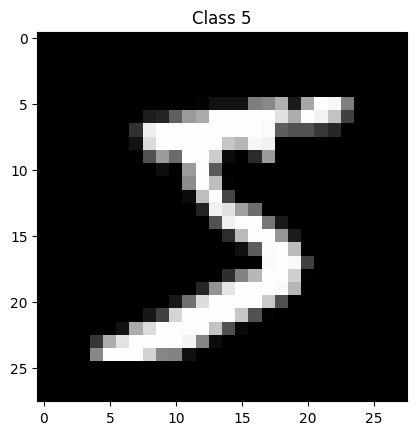

In [81]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [82]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [83]:
number_of_classes = 10

Y_train = utils.to_categorical(y_train, number_of_classes)
Y_test = utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [84]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(12, (4, 4), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#BatchNormalization(axis=-1)

model.add(Conv2D(8, (4, 4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully connected layer
model.add(Flatten())
BatchNormalization()
model.add(Dense(128))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [85]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 25, 25, 12)        204       
                                                                 
 activation_28 (Activation)  (None, 25, 25, 12)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 12)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 9, 9, 8)           1544      
                                                                 
 activation_29 (Activation)  (None, 9, 9, 8)           0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 8)          0         
 g2D)                                                 

In [86]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [87]:
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2496 - accuracy: 0.9222 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0871 - accuracy: 0.9732 - val_loss: 0.0511 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0674 - accuracy: 0.9792 - val_loss: 0.0560 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0416 - val_accuracy: 0.9874
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0490 - accuracy: 0.9848 - val_loss: 0.0412 - val_accuracy: 0.9868
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0440 - val_accuracy

In [88]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0349 - accuracy: 0.9905

Test accuracy:  0.9904999732971191


313/313 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 0.9905
Summary: Loss over the test dataset: 0.03, Accuracy: 0.99


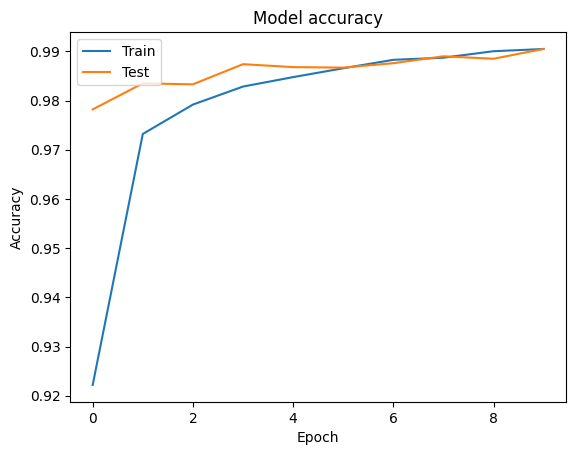

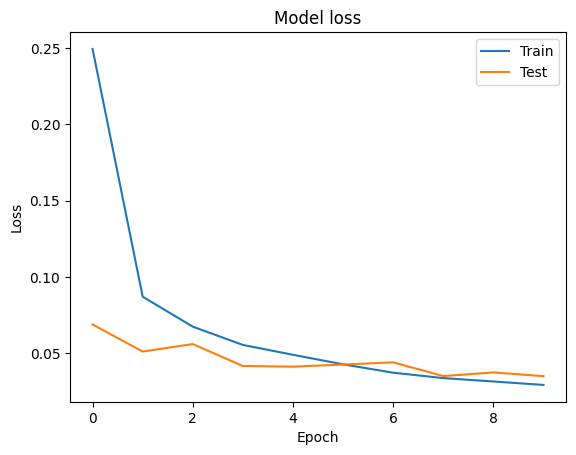

In [89]:
# Training History Visualization
import matplotlib.pyplot as plt

# Evaluate
evaluation = model.evaluate(X_test, Y_test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

157/157 [==============================] - 0s 2ms/step
(10000, 10)


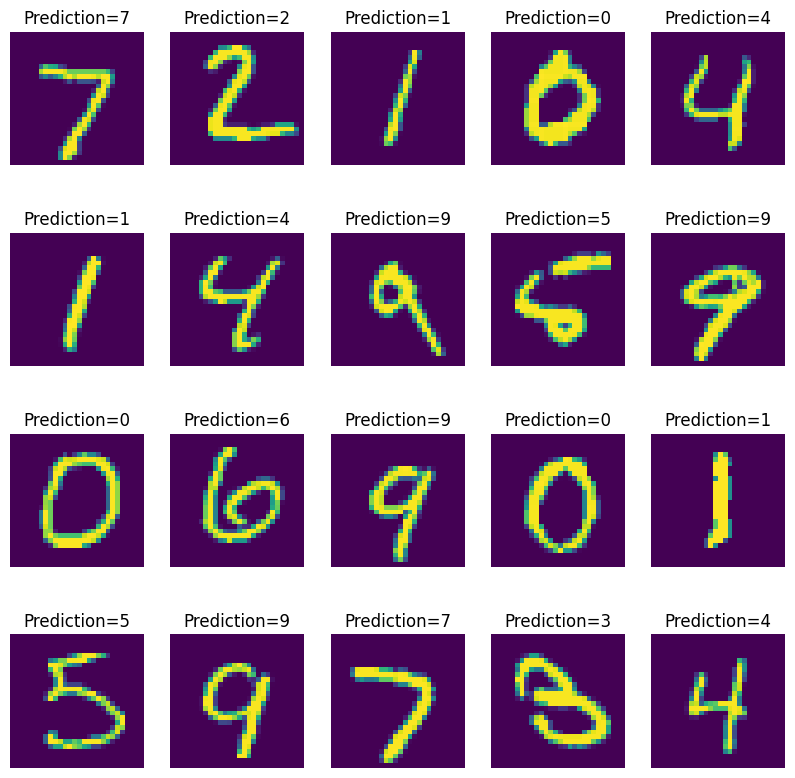

In [90]:
Nplot = 20
plt.figure(figsize=(10,10))
Y = model.predict(X_test, batch_size=64)
#Y=model.predict(X_test)
Y=Y*10.
print(Y.shape)
for n in range(Nplot):
  X=X_test[n,:]
  ax = plt.subplot(4, 5, n+1)
  plt.imshow(X.reshape(28,28))
  plt.axis('off')
  index = np.argmax(Y[n])
  plt.title('Prediction='+str(index))
plt.show()